In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

In [3]:
data = pd.read_csv('Real estate.csv')

In [4]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [6]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
data.shape

(414, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


<AxesSubplot:xlabel='X5 latitude', ylabel='X6 longitude'>

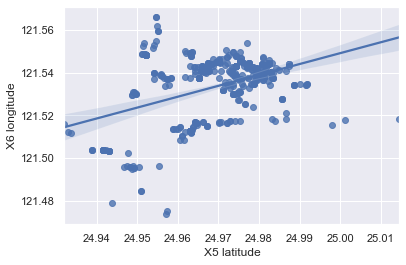

In [10]:
sns.regplot(x="X5 latitude", y="X6 longitude", data = data)

### Simple Linear Regression

In [11]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [12]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [16]:
df = data[['X5 latitude', 'X6 longitude']]
df

,X5 latitude,X6 longitude
0,24.98298,121.54024
1,24.98034,121.53951
2,24.98746,121.54391
3,24.98746,121.54391
4,24.97937,121.54245
...,...,...
409,24.94155,121.50381
410,24.97433,121.54310
411,24.97923,121.53986
412,24.96674,121.54067


In [24]:
x = data["X2 house age"]
x

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

In [26]:
y = data["X3 distance to the nearest MRT station"]
y

0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: X3 distance to the nearest MRT station, Length: 414, dtype: float64

In [28]:
model = LinearRegression()

In [29]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [30]:
model.intercept_ 

1033.6081750490418

In [31]:
model.coef_ 

array([2.83852322])

In [32]:
model.score(np.array(x).reshape(-1,1),y)

0.0006564893110584391

### Multiple Linear Regression

In [35]:
df = pd.read_csv('Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [37]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [38]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [39]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [40]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [41]:
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station']]
y = df['Y house price of unit area']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
model.intercept_

-10048.52906130455

In [46]:
model.coef_

array([ 5.01588508, -0.22073376, -0.00692967])

In [47]:
model.score(X_train, y_train)

0.522130360705944

In [48]:
model.predict(X_test)

array([47.45602678, 31.37846194, 32.56989053, 39.35479288, 37.25999333,
       34.84153297, 41.35058389, 44.74560621, 42.80517956, 37.50161458,
       32.99938803, 38.75754006, 37.6154849 , 39.79993272, 15.12748   ,
       47.98629087, 42.12291413, 19.04503652, 23.99376853, 34.8563306 ,
       39.87257373, 48.1004366 , 35.12349027, 48.50884623, 44.04902587,
       43.75400012, 46.10212192, 40.51884453, 39.45439111, 39.96991424,
       46.91457889, 36.99531035, 47.27963483, 40.5383941 , 42.87483153,
       46.3933086 , 33.24912351, 26.37034158, 37.26289104, 36.37546692,
       44.8922974 , 44.65407039, 39.00740875, 43.81664211, 40.61414064,
       48.89394266, 31.57510425, 25.16051706, 37.39770665, 45.74955155,
       35.01973131, 48.08751188, 32.08598536, 35.08469645, 41.17382708,
       40.48466478, 43.50743819, 38.92574568, 40.40730565, 44.12075919,
       46.88538975, 44.21785352, 30.71745276, 40.61200582, 29.15655164,
       44.03609351, 43.91144354, 45.57956934, 25.93622931, 42.37

In [49]:
y_test.values

array([50.4, 28.1, 13.7, 25.3, 22.3, 40.3, 78. , 47. , 43.9, 25.6, 13.8,
       23. , 37.7, 42.5, 18.6, 63.2, 42.3, 20.7, 24.7, 29.4, 41.5, 58.1,
       31.5, 73.6, 37.3, 47.1, 56.3, 42.5, 38.4, 34.3, 57.8, 21.7, 54.4,
       41. , 43.7, 44.8, 27.3, 21.8, 39.7, 38.8, 53.5, 40.3, 61.5, 49.3,
       78.3, 63.9, 24.8, 23.8, 38.1, 45.7, 20.9, 69.7, 27. , 23.5, 37.8,
       41. , 28.5, 36.5, 38.2, 51.4, 50.7, 40.6, 27.7, 36.2, 27.7, 40.1,
       57.4, 71. , 46.6, 55.1, 26.5, 36.3, 42.9, 59. , 25.9, 45.5, 43.5,
       29.5, 27.3, 42.2, 12.8, 39.5, 31.3])

In [50]:
model.score(X_test, model.predict(X_test))

1.0

In [51]:
model.score(X_train, model.predict(X_train))

1.0

In [52]:
model.score(X_test, y_test)

0.44636705120982334

In [53]:
model.score(X_train, y_train)

0.522130360705944

In [54]:
y = data['X6 longitude']

In [55]:
x = data[['X5 latitude', 'X6 longitude']]

In [56]:
model = LinearRegression()

In [57]:
pd.get_dummies(x, drop_first = True)

,X5 latitude,X6 longitude
0,24.98298,121.54024
1,24.98034,121.53951
2,24.98746,121.54391
3,24.98746,121.54391
4,24.97937,121.54245
...,...,...
409,24.94155,121.50381
410,24.97433,121.54310
411,24.97923,121.53986
412,24.96674,121.54067


In [58]:
model.fit(pd.get_dummies(x, drop_first = True),y)

LinearRegression()

In [60]:
pd.get_dummies(data['No'], drop_first = True)

,2,3,4,5,6,7,8,9,10,11,...,405,406,407,408,409,410,411,412,413,414
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
